# Gambler's ruin problem

## Comparing simulation results with theoretical probability

The problem is as such: Consider a gambler with an initial fortune $i$ and at each turn the gambler has

- probability $p$ of winning $1 \$ $
- probability $q = 1-p$ of losing $1 \$ $

What is the probability that if the gambler starts with $i$ $ \$ $, he reaches $N$ before reaching $0$?


# Simulation of the game


In [41]:
import numpy as np
import matplotlib.pyplot as plt


def gamblers_ruin_outcome(probability,
                          win_prize=1,
                          loss=1,
                          initial_money=15,
                          fortune=30,
                          ruin=0):
    """Return 1 if the gambler succeeds and -1 if he is ruined."""
    money = [initial_money]
    while money[-1] < fortune and money[-1] > ruin:
        if np.random.random() <= probability:
            money.append(money[-1] + win_prize)
        else:
            money.append(money[-1] - loss)
    if money[-1] == fortune:
        return 1
    elif money[-1] == ruin:
        return 0


def simulation_probability(p, i, N, number_of_simulations=1000):
    """Return the proportion of successful outcomes from a simulation"""
    number_of_successes = 0
    number_of_ruins = 0
    for t in range(number_of_simulations):
        outcome = gamblers_ruin_outcome(p, initial_money=i, fortune=N)
        if outcome == 1:
            number_of_successes += 1
        elif outcome == 0:
            number_of_ruins += 1
        else: 
            print("WHAT THE FUCK")
    return number_of_successes/number_of_simulations


# Theoretical results

If we denote $h_i$ to be the probability that the gambler reaches $N$ before $0$, then in theory we have that if $p$ is not equal to $0.5$
$$
h_i = \frac{1 - (q/p)^i}{1 - (q/p)^N}
$$
and if $p = 0.5$
$$
h_i = \frac{i}{N}
$$


In [49]:
def theoretical_probability(p, i, N):
    """Return the theoretical probability of successful gameplay"""
    if p ==0.5:
        return i/N
    else:
        return (1-((1-p)/p)**i)/(1-((1-p)/p)**N)


# Compare theoretical results with simulation


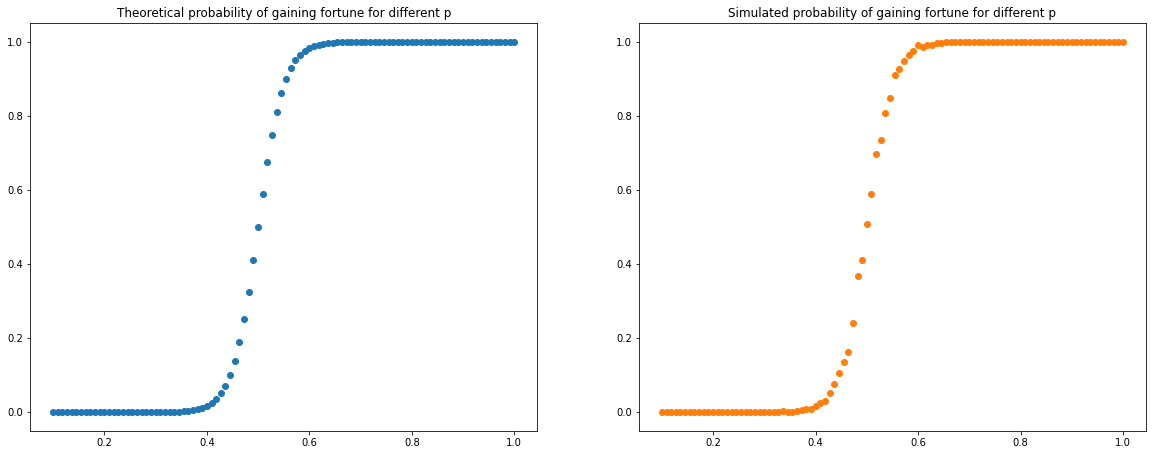

In [62]:
# create a linspace with different probabilities
probabilities = np.linspace(0.1, 1, 100)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7.5))
# plot theoretical probabilities of winning 
for p in probabilities:
    ax1.scatter(p, theoretical_probability(p, i = 10, N = 20), color = "C0")
ax1.title.set_text("Theoretical probability of gaining fortune for different p")

# plot simulation proportion of gaining fortune for different p
for p in probabilities:
    ax2.scatter(p, simulation_probability(p, i=10, N=20, number_of_simulations=1000), color="C1")
ax2.title.set_text("Simulated probability of gaining fortune for different p")
plt.show()
